In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from uuv_trajectory_generator import BezierCurve

np.set_printoptions(suppress=True, precision=2)

In [2]:
q_x = [0, 1, 2, 4, 5, 6]
q_y = [0, 2, 3, 3, 2, 0]
q_z = [0, 1, 0, 0, 2, 2]

q = [np.array([x, y, z]) for x, y, z in zip(q_x, q_y, q_z)]

print('Points:')
print(q)

Points:
[array([0, 0, 0]), array([1, 2, 1]), array([2, 3, 0]), array([4, 3, 0]), array([5, 2, 2]), array([6, 0, 2])]


Text(0.5, 0, 'Z [m]')

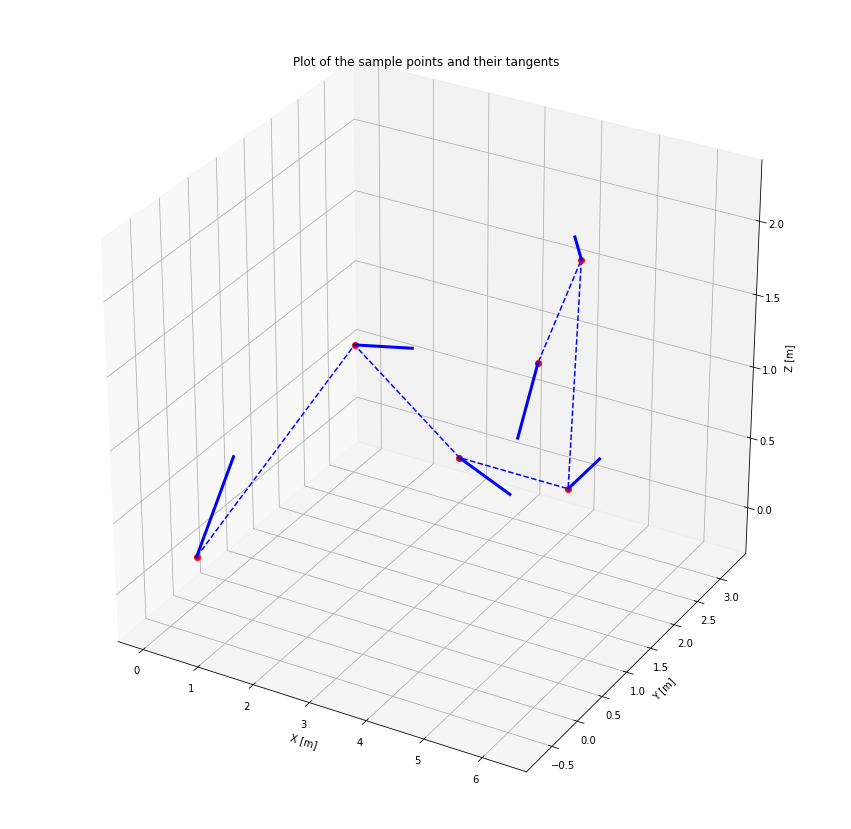

In [3]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the points to be interpolated
ax.plot(q_x, q_y, q_z, 'b--')
ax.plot(q_x, q_y, q_z, 'ro')

# Compute cubic Bezier curve
segments, tangents = BezierCurve.generate_cubic_curve(q)

# Plot the
for i in range(len(q)):
    t = 0.8 * tangents[i]
    ax.plot([q[i][0], q[i][0] + t[0]], [q[i][1], q[i][1] + t[1]], [q[i][2], q[i][2] + t[2]], 'b', linewidth=3)
    
ax.set_title('Plot of the sample points and their tangents')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')

Text(0.5, 0, 'Z [m]')

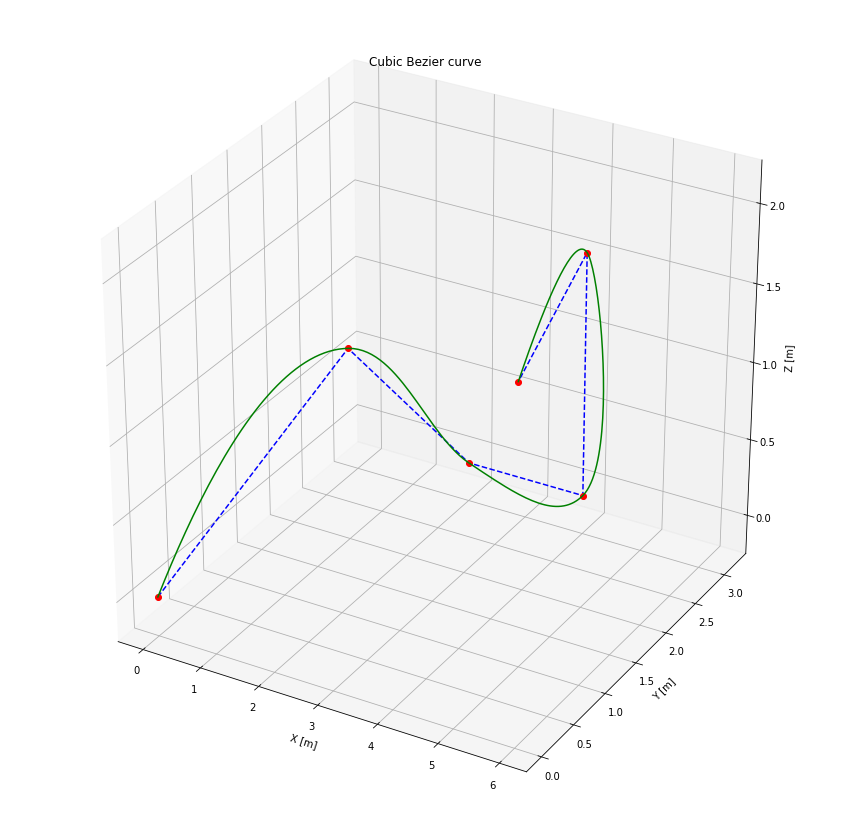

In [4]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the points to be interpolated
ax.plot(q_x, q_y, q_z, 'b--')
ax.plot(q_x, q_y, q_z, 'ro')

lengths = [seg.get_length() for seg in segments]
lengths = [0] + lengths
total_length = np.sum(lengths)

u = np.cumsum(lengths) / total_length

pnts = None
deriv = None
for i in np.linspace(0, 1, 200):
    idx = (u - i >= 0).nonzero()[0][0]
    if idx == 0:
        u_k = 0
        pnts = segments[idx].interpolate(u_k)
        deriv = segments[idx].get_derivative(u_k)
    else:
        u_k = (i - u[idx - 1]) / (u[idx] - u[idx - 1])
        pnts = np.vstack((pnts, segments[idx - 1].interpolate(u_k)))
        deriv = np.vstack((deriv, segments[idx - 1].get_derivative(u_k)))

# Plot the Bezier curve
ax.plot(pnts[:, 0], pnts[:, 1], pnts[:, 2], 'g')    

ax.set_title('Cubic Bezier curve')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')

Text(0.5, 0, 'Z [m]')

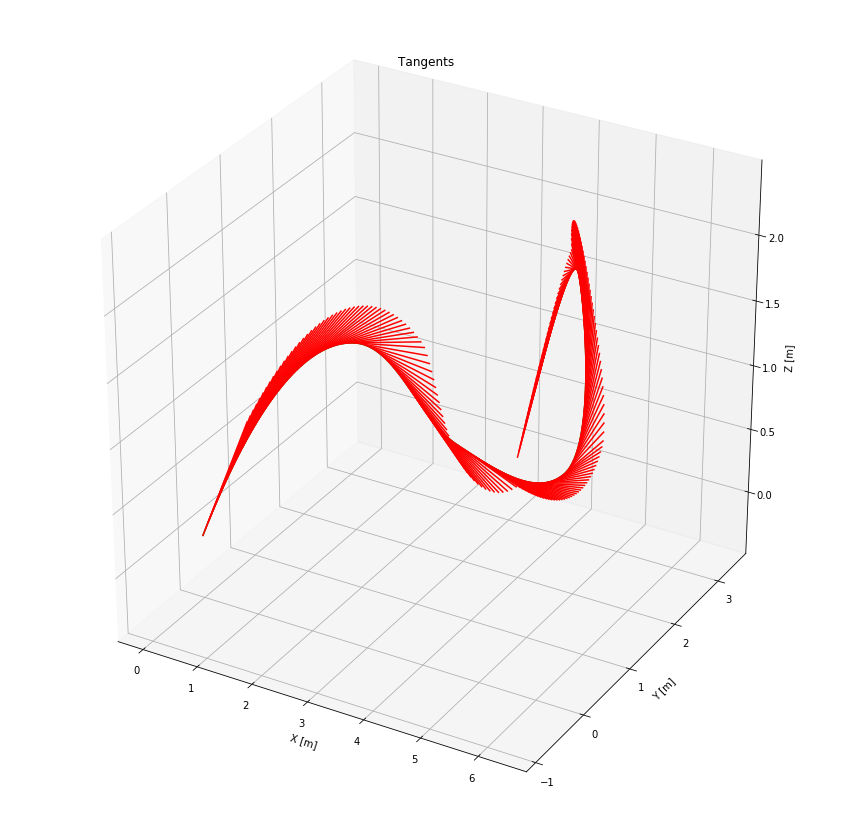

In [5]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot(pnts[:, 0], pnts[:, 1], pnts[:, 2], 'g')  

for d, p in zip(deriv, pnts):
    d /= np.linalg.norm(d) 
    pd = p + d 
    ax.plot([p[0], pd[0]], [p[1], pd[1]], [p[2], pd[2]], 'r')

u = np.array([0, 0.22, 0.38, 0.56, 0.79, 1])

for i in u:
    idx = (u - i >= 0).nonzero()[0][0]
    if idx == 0:
        u_k = 0            
        deriv = segments[idx].get_derivative(u_k)
    else:
        u_k = (i - u[idx - 1]) / (u[idx] - u[idx - 1])            
        deriv = np.vstack((deriv, segments[idx - 1].get_derivative(u_k)))
        
ax.set_title('Tangents')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')